# Бета-распределение
$X \sim Beta(\alpha,\beta) \Leftrightarrow$

\begin{equation}
f_{X} (x)=\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}\label{eq:BetaDensity}
\end{equation}
где $B$ $-$ бета-функция:
$$
B(\alpha,\beta)=\int_{0}^{1}t^{\alpha-1}(1-t)^{\beta-1}dt
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [17]:
# Выберем следующие значения:
a = 1/2
b = 1/2

In [18]:
# Матожидание и дисперсия соответственно:
E = a / (a + b)
D = (a * b) / ((a + b + 1) * (a + b)**2) 

In [19]:
# сгенерируем выборку
sample = sts.beta.rvs(a, b, size=1000)

Text(0.5, 1.0, 'Probability density function of Beta distribution')

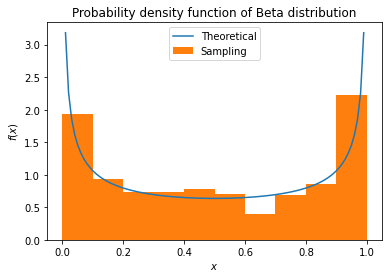

In [20]:
# визуализируем выборку
x = np.linspace(0,1,100)
plt.plot(x, sts.beta.pdf(x, a, b), label='Theoretical')
plt.hist(sample, density=True, label='Sampling')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.title("Probability density function of Beta distribution")

Найдем ожидаемое (по ЦПТ) распределение. Поскольку у Бета-распределения следующие параметры:
$$\mathbb{E} = \frac{\alpha}{\alpha + \beta}, \,\, \mathbb{D} = \frac{\alpha\beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}.$$
Cледовательно, для нормального распределения имеем:
$$ \mu = \mathbb{E} = \frac{\alpha}{\alpha + \beta}$$
$$ \sigma^2 = \frac{\mathbb{D}}{n}$$

In [21]:
E = a / (a + b)
D = (a * b) / ((a + b + 1) * (a + b)**2) 

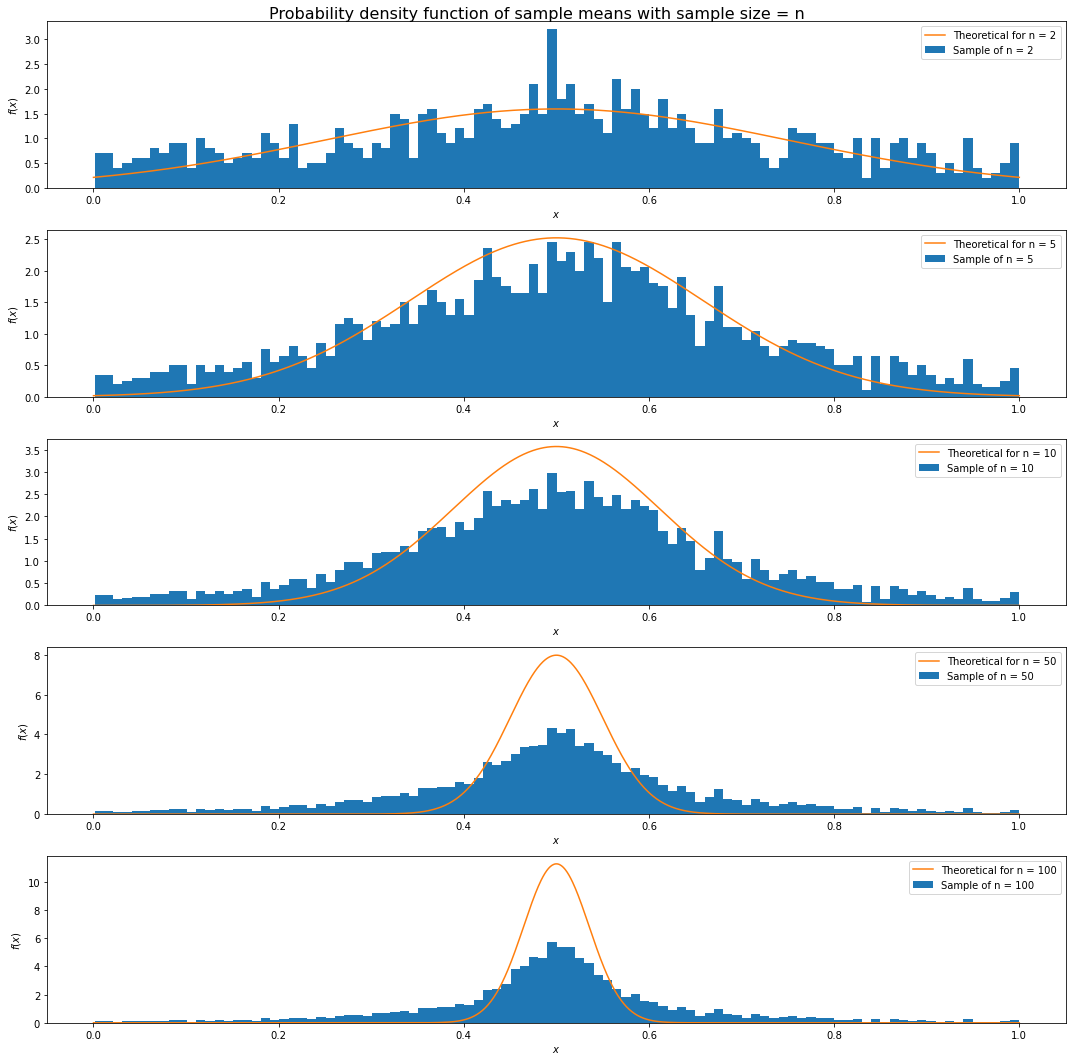

In [31]:
# генерируем выборки
sample_mean = []
x = np.linspace(0,1,1000)
n_values = [2, 5, 10, 50, 100]
fig, axs = plt.subplots(len(n_values), figsize=(15,15))
for n in n_values:
    for _ in range(1000):
        sample_mean.append(sum(sts.beta.rvs(a=a, b=b, size=n)/n))
    axs[n_values.index(n)].hist(sample_mean, bins=100, density=True, label='Sample of n = %d' % n)
    axs[n_values.index(n)].plot(x, sts.norm.pdf(x, loc=E, scale=np.sqrt(D/n)), label='Theoretical for n = %d' % n)
    axs[n_values.index(n)].legend()
    axs[n_values.index(n)].set_ylabel('$f(x)$')
    axs[n_values.index(n)].set_xlabel('$x$')
fig.suptitle('Probability density function of sample means with sample size = n', fontsize=16)
fig.tight_layout()

Q: Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

A: Как видно из графиков, с ростом размера выборки n точность аппроксимации возрастает.